# Telco Customer Churn

#### **Focused customer retention programs**

## About Dataset

### Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

### Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Inspiration
To explore this type of models and learn more about the subject.


**[Kaggle link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)**

# Data exploration

In [1103]:
import pandas as pd
import numpy as np

data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col=0)

In [1104]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes


In [1105]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [1106]:
data.describe(include='object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [1107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

Nice, there are no missing values. But we need to do some encoding

# Preprocessing

Let's make some preprocessing before we move on. So the first thing I'd like to do is change TotalCharges dtype to numpy float64 because now it is an object

In [1108]:
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: float(x) if x!=' ' else 0).astype(np.float64)
data['TotalCharges'].head(10)

customerID
7590-VHVEG      29.85
5575-GNVDE    1889.50
3668-QPYBK     108.15
7795-CFOCW    1840.75
9237-HQITU     151.65
9305-CDSKC     820.50
1452-KIOVK    1949.40
6713-OKOMC     301.90
7892-POOKP    3046.05
6388-TABGU    3487.95
Name: TotalCharges, dtype: float64

That's it! Now we can start encoding categorical values

# Categorical features 

First of all we should split the data into target and features (y and X correspondingly)

In [1109]:
X, y = data.iloc[:, :-1].copy(), data.iloc[:, -1].copy()

In [1110]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


In [1111]:
y

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7043, dtype: object

Next we will define what columns are categorical and what are numerical

In [1112]:
cat_cols = [x for x in X.columns if X[x].dtype == 'object']
num_cols = [x for x in X.columns if X[x].dtype in [np.float64, np.int64]]
num_cols.remove('SeniorCitizen')
cat_cols.append('SeniorCitizen')
cat_cols, num_cols

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'SeniorCitizen'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'])

Now lets view all unique values in each categorical column

In [1113]:
for x in cat_cols:
    print(x + ": " + ', '.join(X[x].unique().astype(str)))

gender: Female, Male
Partner: Yes, No
Dependents: No, Yes
PhoneService: No, Yes
MultipleLines: No phone service, No, Yes
InternetService: DSL, Fiber optic, No
OnlineSecurity: No, Yes, No internet service
OnlineBackup: Yes, No, No internet service
DeviceProtection: No, Yes, No internet service
TechSupport: No, Yes, No internet service
StreamingTV: No, Yes, No internet service
StreamingMovies: No, Yes, No internet service
Contract: Month-to-month, One year, Two year
PaperlessBilling: Yes, No
PaymentMethod: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
SeniorCitizen: 0, 1


Let's use OrdinalEncoder to replace all categorical values with numeric

In [1114]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='error')
X[cat_cols] = encoder.fit_transform(X[cat_cols])
X.head(10)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
5575-GNVDE,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
3668-QPYBK,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
7795-CFOCW,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
9237-HQITU,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65
9305-CDSKC,0.0,0.0,0.0,0.0,8,1.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50
1452-KIOVK,1.0,0.0,0.0,1.0,22,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40
6713-OKOMC,0.0,0.0,0.0,0.0,10,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,301.90
7892-POOKP,0.0,0.0,1.0,0.0,28,1.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,104.80,3046.05


And now let's transform the target as well

In [1115]:
target_encoder = OrdinalEncoder()
y = pd.Series(target_encoder.fit_transform(y.values.reshape(-1,1)).reshape(1,-1)[0], index=y.index)
y

customerID
7590-VHVEG    0.0
5575-GNVDE    0.0
3668-QPYBK    1.0
7795-CFOCW    0.0
9237-HQITU    1.0
             ... 
6840-RESVB    0.0
2234-XADUH    0.0
4801-JZAZL    0.0
8361-LTMKD    1.0
3186-AJIEK    0.0
Length: 7043, dtype: float64

# Numerical features + transformation

First thing to do is to apply minmax scaling to the whole dataset in order to use further transformation techniques such as boxcox

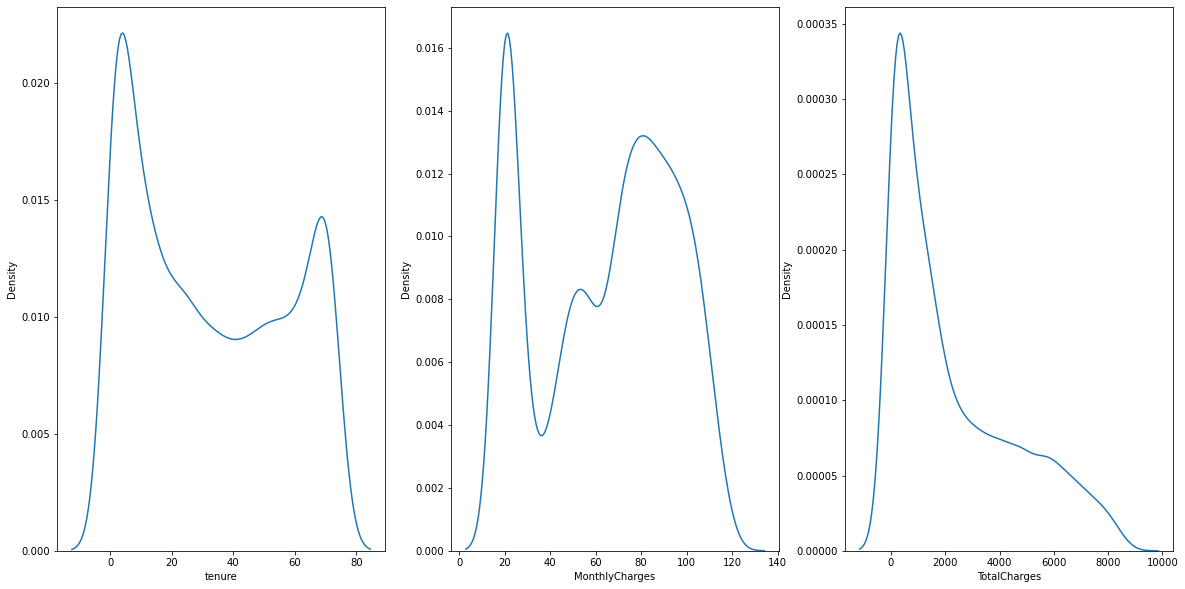

In [1116]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
for i, col in enumerate (num_cols,1):
    plt.subplot(1,3,i)
    sns.kdeplot(data=X[col])


Okay, I think we should try to use np.cbrt transformation to make TotalCharges more normally distributed

In [1117]:
from scipy import stats
cbrt_transform_cols = ['TotalCharges']



In [1118]:
for x in log_transform_cols:
   X[x] = np.cbrt(X[x])
   pass


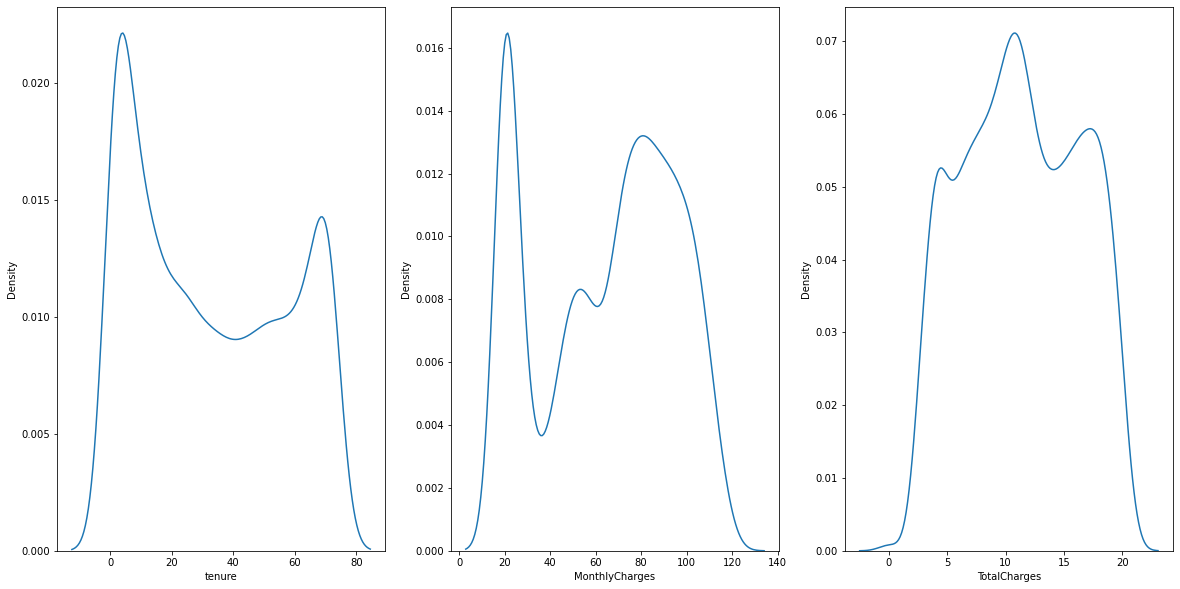

In [1119]:
plt.figure(figsize=(20,10))
for i, col in enumerate (num_cols,1):
    plt.subplot(1,3,i)
    sns.kdeplot(data=X[col])


And the last thing to do here is to use StandardScaler scaling to give our features the same shape across all the columns

In [1120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.675306
5575-GNVDE,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.208563
3668-QPYBK,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.337138
7795-CFOCW,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.186745
9237-HQITU,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.221532
9305-CDSKC,-1.009559,-0.439916,-0.966622,-0.654012,-0.992402,0.327438,1.117034,0.172250,-0.918838,-1.029919,1.245111,-0.925262,1.146547,1.138411,-0.828207,0.829798,0.398558,1.159546,-0.401910
1452-KIOVK,0.990532,-0.439916,-0.966622,1.529024,-0.422317,0.327438,1.117034,0.172250,-0.918838,1.242550,-1.027910,-0.925262,1.146547,-1.121405,-0.828207,0.829798,-0.537747,0.808907,0.234862
6713-OKOMC,-1.009559,-0.439916,-0.966622,-0.654012,-0.910961,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,-1.205113,1.334863,-1.163647,-0.941674
7892-POOKP,-1.009559,-0.439916,1.034530,-0.654012,-0.177995,0.327438,1.117034,0.172250,-0.918838,-1.029919,1.245111,1.396299,1.146547,1.138411,-0.828207,0.829798,0.398558,1.330711,0.642500


# Modeling

I am going to use keras binary classification model to make predictions based on the data

In [1121]:
X.shape

(7043, 19)

Now let's split the dataset into train and valid sets

In [1122]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [1123]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[19]),
    layers.Dense(128, activation='relu'), 
    layers.Dense(128, activation='relu'),   
    layers.Dense(128, activation='relu'),  
    layers.Dense(128, activation='relu'),  
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[keras.metrics.AUC(name='auc')],
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Train on 5282 samples, validate on 1761 samples
Epoch 1/1000
5282/5282 [==============================] - 1s 145us/sample - loss: 0.5679 - auc: 0.5986 - val_loss: 0.4964 - val_auc: 0.8224
Epoch 2/1000
5282/5282 [==============================] - 0s 38us/sample - loss: 0.4561 - auc: 0.8134 - val_loss: 0.4488 - val_auc: 0.8356
Epoch 3/1000
5282/5282 [==============================] - 0s 39us/sample - loss: 0.4337 - auc: 0.8339 - val_loss: 0.4417 - val_auc: 0.8368
Epoch 4/1000
5282/5282 [==============================] - 0s 40us/sample - loss: 0.4158 - auc: 0.8461 - val_loss: 0.4273 - val_auc: 0.8450
Epoch 5/1000
5282/5282 [==============================] - 0s 39us/sample - loss: 0.4044 - auc: 0.8530 - val_loss: 0.4290 - val_auc: 0.8450
Epoch 6/1000
5282/5282 [==============================] - 0s 38us/sample - loss: 0.3963 - auc: 0.8593 - val_loss: 0.4270 - val_auc: 0.8446
Epoch 7/1000
5282/5282 [==============================] - 0s 39us/sample - loss: 0.3901 - auc: 0.8641 - val_loss: 0.4

<AxesSubplot:>

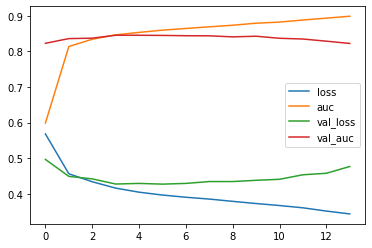

In [1124]:
pd.DataFrame(history.history).plot()

In [1125]:
model.evaluate(X_valid, y_valid)

1761/1761 [==============================] - 0s 109us/sample - loss: 0.4273 - auc: 0.8450


[0.4272741884551625, 0.8450141]

Thank you very much for reading!